In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/college/pddm/review_mpaspor.csv')
print(df.head(10))

               userName  score                   at  \
0  Anggun Virly channel      1  2024-01-05 22:03:03   
1           Juni Arjuna      1  2024-01-05 16:47:02   
2        Khamdan Ambari      1  2024-01-05 15:54:11   
3     Antika Yosa Fitri      1  2024-01-05 15:14:19   
4    PENDAKI PAM chanel      1  2024-01-05 11:15:01   
5         Nora Wiqayati      1  2024-01-05 10:58:02   
6        Rendy Sihaloho      1  2024-01-05 05:29:58   
7           tommy fondy      5  2024-01-05 04:34:46   
8           abaz Gorden      1  2024-01-05 04:17:42   
9           EDY MUSTOFA      1  2024-01-04 13:33:47   

                                             content  
0                             Kode billing tidak ada  
1  App nya saya mohon di perbaiki,saya udh log-in...  
2  Maksudnya apa ini qplikasi, kirain bisa memban...  
3  Bikin aplikasi, bukan memudahkan tetapi bikin ...  
4                  aplikasi makan sagu Rakyat miskin  
5  Paspor nggak bisa dinyatakan rusak apa tidak, ...  
6  Ini gi

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, precision_score
import pickle
from pickle import dump
from pickle import load
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from textblob import TextBlob
from textblob.translate import Translator
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.1 MB/s eta 0:00:00


In [ ]:
#casefolding
def casefolding(teks):
    #agar menjadi lower text semua
    teks = teks.lower()

    #menghapus karakter selain  text
    dataset = re.sub(r'@[A-Za-a0-9]+',' ', teks)
    dataset = re.sub(r'#[A-Za-z0-9]+',' ', teks)
    dataset = re.sub(r"http\S+", ' ', teks)
    dataset = re.sub(r'[0-9]+', ' ', teks)
    dataset = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", teks)

    return teks

In [ ]:
#membagi text menjadi sebuah token
def tokenisasi(teks):
    teks = word_tokenize(teks)

    return teks

In [ ]:
#normalisasi pengecekan typo dengan kamus
def normalisasi(teks):
    kamusSlang = eval(open("kamus.txt").read())
    pattern = re.compile(r'\b( ' + '|'.join (kamusSlang.keys())+r')\b')
    content = []
    for kata in teks:
        filterSlang = pattern.sub(lambda x: kamusSlang[x.group()],kata)
        content.append(filterSlang.lower())
    teks = content
    return teks


In [ ]:
#penghapusan stopwords
stopwords_indonesia = set(stopwords.words('indonesian'))

def removedStopwords(teks):
    tokens_with_no_stopwords = list()

    for word in teks:
        if word not in stopwords_indonesia:
            tokens_with_no_stopwords.append(word)

    return tokens_with_no_stopwords

In [ ]:
#stemming yaitu mengubah menjadi kata dasar

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(teks):
    return [stemmer.stem(word) for word in teks]

In [ ]:
#df = pd.read_csv('review_gojek.csv')
print(df.head(10))

               userName  score                   at  \
0  Anggun Virly channel      1  2024-01-05 22:03:03   
1           Juni Arjuna      1  2024-01-05 16:47:02   
2        Khamdan Ambari      1  2024-01-05 15:54:11   
3     Antika Yosa Fitri      1  2024-01-05 15:14:19   
4    PENDAKI PAM chanel      1  2024-01-05 11:15:01   
5         Nora Wiqayati      1  2024-01-05 10:58:02   
6        Rendy Sihaloho      1  2024-01-05 05:29:58   
7           tommy fondy      5  2024-01-05 04:34:46   
8           abaz Gorden      1  2024-01-05 04:17:42   
9           EDY MUSTOFA      1  2024-01-04 13:33:47   

                                             content  
0                             Kode billing tidak ada  
1  App nya saya mohon di perbaiki,saya udh log-in...  
2  Maksudnya apa ini qplikasi, kirain bisa memban...  
3  Bikin aplikasi, bukan memudahkan tetapi bikin ...  
4                  aplikasi makan sagu Rakyat miskin  
5  Paspor nggak bisa dinyatakan rusak apa tidak, ...  
6  Ini gi

In [ ]:
#Menghapus kolom username, tangga dan versi aplikasi
df.drop(['userName', 'at'], axis=1, inplace=True)

In [ ]:
df=df.head(20)
df

,score,content
0,1,Kode billing tidak ada
1,1,"App nya saya mohon di perbaiki,saya udh log-in..."
2,1,"Maksudnya apa ini qplikasi, kirain bisa memban..."
3,1,"Bikin aplikasi, bukan memudahkan tetapi bikin ..."
4,1,aplikasi makan sagu Rakyat miskin
5,1,"Paspor nggak bisa dinyatakan rusak apa tidak, ..."
6,1,Ini gimana si di pilih tanggal gak mau gabisa ...
7,5,Good
8,1,"Aplikasi milik negara kok gini amat ya, susah ..."
9,1,Aplikasinya Tidak bisa dibuka


In [ ]:
#Mengambil 3.000 data

def select_data(df, output_file, counts):

    selected_data = pd.concat([
        df[df['score'] == 1].head(counts[1]),
        df[df['score'] == 2].head(counts[2]),
        df[df['score'] == 3].head(counts[3]),
        df[df['score'] == 4].head(counts[4]),
        df[df['score'] == 5].head(counts[5])
    ])
    return selected_data

output_file = 'dataset_gojek.csv'
counts = {1: 1000, 2: 500, 3: 0, 4: 500, 5: 1000}

df=select_data(df, output_file, counts)
df.reset_index(drop=True, inplace=True)


print("3.000 data yang dipilih (1.500 negatif dan 1.500 positif) dan diurutkan sesuai tanggal telah disimpan sebagai:", output_file)

3.000 data yang dipilih (1.500 negatif dan 1.500 positif) dan diurutkan sesuai tanggal telah disimpan sebagai: dataset_gojek.csv


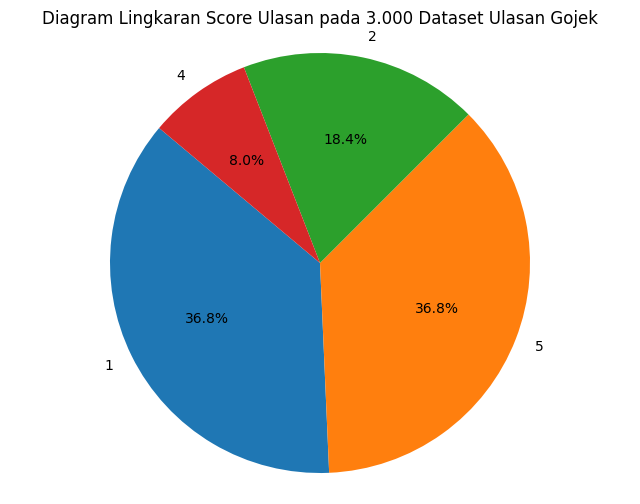

In [ ]:
#Diagram lingkaran score dataset yang digunakan
score_counts = df['score'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Diagram Lingkaran Score Ulasan pada 3.000 Dataset Ulasan Gojek')
plt.show()

In [ ]:
df.head(20)

,score,content
0,1,Kode billing tidak ada
1,1,"App nya saya mohon di perbaiki,saya udh log-in..."
2,1,"Maksudnya apa ini qplikasi, kirain bisa memban..."
3,1,"Bikin aplikasi, bukan memudahkan tetapi bikin ..."
4,1,aplikasi makan sagu Rakyat miskin
5,1,"Paspor nggak bisa dinyatakan rusak apa tidak, ..."
6,1,Ini gimana si di pilih tanggal gak mau gabisa ...
7,1,"Aplikasi milik negara kok gini amat ya, susah ..."
8,1,Aplikasinya Tidak bisa dibuka
9,1,Error Mulu billingnya gak muncul udah 1000 kal...


In [ ]:
#Melabeli dataset dengan sentimen negatif dan positif

def label_data(score):
    if score in [1, 2]:
        return 'negatif'
    elif score in [4, 5]:
        return 'positif'

def label_csv(df):

    df['label'] = df['score'].apply(label_data)

    return df

df=label_csv(df)
df.head(10)

,score,content,label
0,1,Kode billing tidak ada,negatif
1,1,"App nya saya mohon di perbaiki,saya udh log-in...",negatif
2,1,"Maksudnya apa ini qplikasi, kirain bisa memban...",negatif
3,1,"Bikin aplikasi, bukan memudahkan tetapi bikin ...",negatif
4,1,aplikasi makan sagu Rakyat miskin,negatif
5,1,"Paspor nggak bisa dinyatakan rusak apa tidak, ...",negatif
6,1,Ini gimana si di pilih tanggal gak mau gabisa ...,negatif
7,1,"Aplikasi milik negara kok gini amat ya, susah ...",negatif
8,1,Aplikasinya Tidak bisa dibuka,negatif
9,1,Error Mulu billingnya gak muncul udah 1000 kal...,negatif


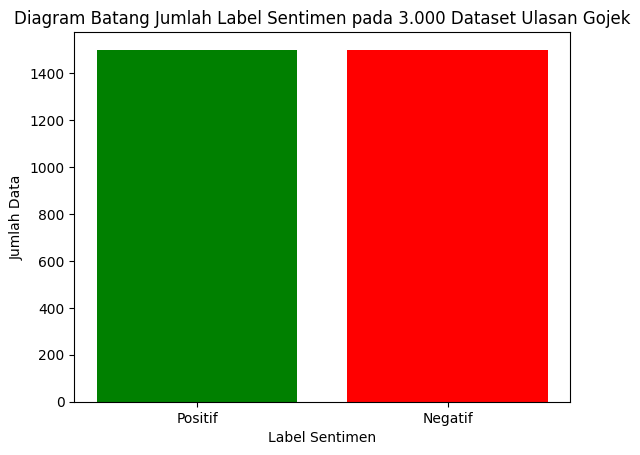

In [ ]:
#Diagram batang label sentimen
def count_labels(df):

    positive_count = (df['label'] == 'positif').sum()
    negative_count = (df['label'] == 'negatif').sum()

    return positive_count, negative_count

def plot_bar_chart(positive_count, negative_count):

    labels = ['Positif', 'Negatif']
    counts = [positive_count, negative_count]

    plt.bar(labels, counts, color=['green', 'red'])
    plt.xlabel('Label Sentimen')
    plt.ylabel('Jumlah Data')
    plt.title('Diagram Batang Jumlah Label Sentimen pada 3.000 Dataset Ulasan Gojek')
    plt.show()

positive_count, negative_count = count_labels(df)

plot_bar_chart(positive_count, negative_count)

In [ ]:
#Mengecek ukuran dataset
df.shape

(3000, 3)

In [ ]:
#Info data secara keseluruhan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  3000 non-null   object
 1   score    3000 non-null   int64 
 2   label    3000 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.4+ KB


In [ ]:
#Mengecek ulasan dengan value 0 pada dataset
df.isnull().sum()

content    0
dtype: int64

In [ ]:
#Menghapus baris yang memiliki ulasan dengan value o
df.dropna(axis = 0, how = 'any', inplace = True)

In [ ]:
df.head(10)

,content,score,label
0,akun gopay saya di blok,1,negatif
1,Baru download gojek dan hape baru trus ditop u...,1,negatif
2,Gimana ini kak pin saya salah terus padahal ud...,1,negatif
3,Biar aman kamu tidak bisa pakai gojek Jadi say...,1,negatif
4,Kumpulan driver sampah,1,negatif
5,Makin lama gojek makin ngga jelas susah bgt da...,1,negatif
6,Aplikasi asuuu makin lama main gx jelas Ais ...,1,negatif
7,Misi dari gojek jago gak jelas syarat penyeles...,1,negatif
8,Gak jelas,1,negatif
9,Kebanyakan pembaruan,1,negatif


In [ ]:
df['casefolding'] = df['content'].apply(casefolding)
df.head(10)

,content,score,label,casefolding
0,akun gopay saya di blok,1,negatif,akun gopay saya di blok
1,Baru download gojek dan hape baru trus ditop u...,1,negatif,baru download gojek dan hape baru trus ditop u...
2,Gimana ini kak pin saya salah terus padahal ud...,1,negatif,gimana ini kak pin saya salah terus padahal ud...
3,Biar aman kamu tidak bisa pakai gojek Jadi say...,1,negatif,biar aman kamu tidak bisa pakai gojek jadi say...
4,Kumpulan driver sampah,1,negatif,kumpulan driver sampah
5,Makin lama gojek makin ngga jelas susah bgt da...,1,negatif,makin lama gojek makin ngga jelas susah bgt da...
6,Aplikasi asuuu makin lama main gx jelas Ais ...,1,negatif,aplikasi asuuu makin lama main gx jelas ais ...
7,Misi dari gojek jago gak jelas syarat penyeles...,1,negatif,misi dari gojek jago gak jelas syarat penyeles...
8,Gak jelas,1,negatif,gak jelas
9,Kebanyakan pembaruan,1,negatif,kebanyakan pembaruan


In [ ]:
df['tokenization'] = df['casefolding'].apply(tokenisasi)
df.head(10)

,content,score,label,casefolding,tokenization
0,akun gopay saya di blok,1,negatif,akun gopay saya di blok,"[akun, gopay, saya, di, blok]"
1,Baru download gojek dan hape baru trus ditop u...,1,negatif,baru download gojek dan hape baru trus ditop u...,"[baru, download, gojek, dan, hape, baru, trus,..."
2,Gimana ini kak pin saya salah terus padahal ud...,1,negatif,gimana ini kak pin saya salah terus padahal ud...,"[gimana, ini, kak, pin, saya, salah, terus, pa..."
3,Biar aman kamu tidak bisa pakai gojek Jadi say...,1,negatif,biar aman kamu tidak bisa pakai gojek jadi say...,"[biar, aman, kamu, tidak, bisa, pakai, gojek, ..."
4,Kumpulan driver sampah,1,negatif,kumpulan driver sampah,"[kumpulan, driver, sampah]"
5,Makin lama gojek makin ngga jelas susah bgt da...,1,negatif,makin lama gojek makin ngga jelas susah bgt da...,"[makin, lama, gojek, makin, ngga, jelas, susah..."
6,Aplikasi asuuu makin lama main gx jelas Ais ...,1,negatif,aplikasi asuuu makin lama main gx jelas ais ...,"[aplikasi, asuuu, makin, lama, main, gx, jelas..."
7,Misi dari gojek jago gak jelas syarat penyeles...,1,negatif,misi dari gojek jago gak jelas syarat penyeles...,"[misi, dari, gojek, jago, gak, jelas, syarat, ..."
8,Gak jelas,1,negatif,gak jelas,"[gak, jelas]"
9,Kebanyakan pembaruan,1,negatif,kebanyakan pembaruan,"[kebanyakan, pembaruan]"


In [ ]:
df['normalisasi'] = df['tokenization'].apply(normalisasi)
df.head(10)

,content,score,label,casefolding,tokenization,normalisasi
0,akun gopay saya di blok,1,negatif,akun gopay saya di blok,"[akun, gopay, saya, di, blok]","[akun, gopay, saya, di, bodoh]"
1,Baru download gojek dan hape baru trus ditop u...,1,negatif,baru download gojek dan hape baru trus ditop u...,"[baru, download, gojek, dan, hape, baru, trus,...","[baru, unduh, ojek online, dan, seluler, baru,..."
2,Gimana ini kak pin saya salah terus padahal ud...,1,negatif,gimana ini kak pin saya salah terus padahal ud...,"[gimana, ini, kak, pin, saya, salah, terus, pa...","[bagaimana, ini, kak, pin, saya, salah, terus,..."
3,Biar aman kamu tidak bisa pakai gojek Jadi say...,1,negatif,biar aman kamu tidak bisa pakai gojek jadi say...,"[biar, aman, kamu, tidak, bisa, pakai, gojek, ...","[biar, aman, kamu, tidak, bisa, pakai, ojek on..."
4,Kumpulan driver sampah,1,negatif,kumpulan driver sampah,"[kumpulan, driver, sampah]","[kumpulan, pengendara, sampah]"
5,Makin lama gojek makin ngga jelas susah bgt da...,1,negatif,makin lama gojek makin ngga jelas susah bgt da...,"[makin, lama, gojek, makin, ngga, jelas, susah...","[makin, lama, ojek online, makin, tidak, jelas..."
6,Aplikasi asuuu makin lama main gx jelas Ais ...,1,negatif,aplikasi asuuu makin lama main gx jelas ais ...,"[aplikasi, asuuu, makin, lama, main, gx, jelas...","[aplikasi, asuuu, makin, lama, main, gx, jelas..."
7,Misi dari gojek jago gak jelas syarat penyeles...,1,negatif,misi dari gojek jago gak jelas syarat penyeles...,"[misi, dari, gojek, jago, gak, jelas, syarat, ...","[misi, dari, ojek online, jago, gak, jelas, sy..."
8,Gak jelas,1,negatif,gak jelas,"[gak, jelas]","[gak, jelas]"
9,Kebanyakan pembaruan,1,negatif,kebanyakan pembaruan,"[kebanyakan, pembaruan]","[kebanyakan, pembaruan]"


In [ ]:
df['removedStopwords'] = df['normalisasi'].apply(removedStopwords)
df.head(10)

,content,score,label,casefolding,tokenization,normalisasi,removedStopwords
0,akun gopay saya di blok,1,negatif,akun gopay saya di blok,"[akun, gopay, saya, di, blok]","[akun, gopay, saya, di, bodoh]","[akun, gopay, bodoh]"
1,Baru download gojek dan hape baru trus ditop u...,1,negatif,baru download gojek dan hape baru trus ditop u...,"[baru, download, gojek, dan, hape, baru, trus,...","[baru, unduh, ojek online, dan, seluler, baru,...","[unduh, ojek online, seluler, ditop, gopay, tr..."
2,Gimana ini kak pin saya salah terus padahal ud...,1,negatif,gimana ini kak pin saya salah terus padahal ud...,"[gimana, ini, kak, pin, saya, salah, terus, pa...","[bagaimana, ini, kak, pin, saya, salah, terus,...","[kak, pin, salah, ubah, salah]"
3,Biar aman kamu tidak bisa pakai gojek Jadi say...,1,negatif,biar aman kamu tidak bisa pakai gojek jadi say...,"[biar, aman, kamu, tidak, bisa, pakai, gojek, ...","[biar, aman, kamu, tidak, bisa, pakai, ojek on...","[biar, aman, pakai, ojek online, copot, biar, ..."
4,Kumpulan driver sampah,1,negatif,kumpulan driver sampah,"[kumpulan, driver, sampah]","[kumpulan, pengendara, sampah]","[kumpulan, pengendara, sampah]"
5,Makin lama gojek makin ngga jelas susah bgt da...,1,negatif,makin lama gojek makin ngga jelas susah bgt da...,"[makin, lama, gojek, makin, ngga, jelas, susah...","[makin, lama, ojek online, makin, tidak, jelas...","[ojek online, susah, banget, pengendara, gofoo..."
6,Aplikasi asuuu makin lama main gx jelas Ais ...,1,negatif,aplikasi asuuu makin lama main gx jelas ais ...,"[aplikasi, asuuu, makin, lama, main, gx, jelas...","[aplikasi, asuuu, makin, lama, main, gx, jelas...","[aplikasi, asuuu, main, gx, ais, aplikasi, leb..."
7,Misi dari gojek jago gak jelas syarat penyeles...,1,negatif,misi dari gojek jago gak jelas syarat penyeles...,"[misi, dari, gojek, jago, gak, jelas, syarat, ...","[misi, dari, ojek online, jago, gak, jelas, sy...","[misi, ojek online, jago, gak, syarat, penyele..."
8,Gak jelas,1,negatif,gak jelas,"[gak, jelas]","[gak, jelas]",[gak]
9,Kebanyakan pembaruan,1,negatif,kebanyakan pembaruan,"[kebanyakan, pembaruan]","[kebanyakan, pembaruan]","[kebanyakan, pembaruan]"


In [ ]:
df['stemming'] = df['removedStopwords'].apply(stemming)
df.head(10)

,content,score,label,casefolding,tokenization,normalisasi,removedStopwords,stemming
0,akun gopay saya di blok,1,negatif,akun gopay saya di blok,"[akun, gopay, saya, di, blok]","[akun, gopay, saya, di, bodoh]","[akun, gopay, bodoh]","[akun, gopay, bodoh]"
1,Baru download gojek dan hape baru trus ditop u...,1,negatif,baru download gojek dan hape baru trus ditop u...,"[baru, download, gojek, dan, hape, baru, trus,...","[baru, unduh, ojek online, dan, seluler, baru,...","[unduh, ojek online, seluler, ditop, gopay, tr...","[unduh, ojek online, seluler, top, gopay, tran..."
2,Gimana ini kak pin saya salah terus padahal ud...,1,negatif,gimana ini kak pin saya salah terus padahal ud...,"[gimana, ini, kak, pin, saya, salah, terus, pa...","[bagaimana, ini, kak, pin, saya, salah, terus,...","[kak, pin, salah, ubah, salah]","[kak, pin, salah, ubah, salah]"
3,Biar aman kamu tidak bisa pakai gojek Jadi say...,1,negatif,biar aman kamu tidak bisa pakai gojek jadi say...,"[biar, aman, kamu, tidak, bisa, pakai, gojek, ...","[biar, aman, kamu, tidak, bisa, pakai, ojek on...","[biar, aman, pakai, ojek online, copot, biar, ...","[biar, aman, pakai, ojek online, copot, biar, ..."
4,Kumpulan driver sampah,1,negatif,kumpulan driver sampah,"[kumpulan, driver, sampah]","[kumpulan, pengendara, sampah]","[kumpulan, pengendara, sampah]","[kumpul, kendara, sampah]"
5,Makin lama gojek makin ngga jelas susah bgt da...,1,negatif,makin lama gojek makin ngga jelas susah bgt da...,"[makin, lama, gojek, makin, ngga, jelas, susah...","[makin, lama, ojek online, makin, tidak, jelas...","[ojek online, susah, banget, pengendara, gofoo...","[ojek online, susah, banget, kendara, gofood, ..."
6,Aplikasi asuuu makin lama main gx jelas Ais ...,1,negatif,aplikasi asuuu makin lama main gx jelas ais ...,"[aplikasi, asuuu, makin, lama, main, gx, jelas...","[aplikasi, asuuu, makin, lama, main, gx, jelas...","[aplikasi, asuuu, main, gx, ais, aplikasi, leb...","[aplikasi, asuuu, main, gx, ais, aplikasi, leb..."
7,Misi dari gojek jago gak jelas syarat penyeles...,1,negatif,misi dari gojek jago gak jelas syarat penyeles...,"[misi, dari, gojek, jago, gak, jelas, syarat, ...","[misi, dari, ojek online, jago, gak, jelas, sy...","[misi, ojek online, jago, gak, syarat, penyele...","[misi, ojek online, jago, gak, syarat, selesai..."
8,Gak jelas,1,negatif,gak jelas,"[gak, jelas]","[gak, jelas]",[gak],[gak]
9,Kebanyakan pembaruan,1,negatif,kebanyakan pembaruan,"[kebanyakan, pembaruan]","[kebanyakan, pembaruan]","[kebanyakan, pembaruan]","[banyak, baru]"


In [ ]:
#Menyimpan dataset setelah dipreprosesing
backup=df
df.to_csv("preproses_gojek.csv", index=False)
df.head(10)

,score,content
0,1,Kode billing tidak ada
1,1,"App nya saya mohon di perbaiki,saya udh log-in..."
2,1,"Maksudnya apa ini qplikasi, kirain bisa memban..."
3,1,"Bikin aplikasi, bukan memudahkan tetapi bikin ..."
4,1,aplikasi makan sagu Rakyat miskin
5,1,"Paspor nggak bisa dinyatakan rusak apa tidak, ..."
6,1,Ini gimana si di pilih tanggal gak mau gabisa ...
7,5,Good
8,1,"Aplikasi milik negara kok gini amat ya, susah ..."
9,1,Aplikasinya Tidak bisa dibuka


### **Modelling**

In [ ]:
#Melakukan spliting untuk X dan Y pada training dan testing
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan label
X = df['stemming']
y = df['label']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data latih dan data uji
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400,)
(600,)
(2400,)
(600,)


In [ ]:
#tf idf
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Nama file CSV input
input_file = "preproses_gojek.csv"

try:
    # Membaca DataFrame dari file CSV input
    df = pd.read_csv(input_file)
except FileNotFoundError:
    print("File tidak ditemukan.")
    exit()

# Mengganti kolom stemming dengan string kosong
df['stemming'].fillna('', inplace=True)

# Mengabaikan istilah yang muncul di lebih dari 50% dokumen dan istilah yang muncul kurang dari 2
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=2)

# Membobotkan dataset yang berisi konten review
tfidf_x = tfidf_vectorizer.fit_transform(df['stemming'])

# Konversi tfidf ke matrix dengan kolom adalah nama fitur
X_vect = pd.DataFrame(tfidf_x.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X_vect.head(1000)

# Menyimpan hasil tf-idf ke file CSV baru
output_file = 'tfidf_gojek.csv'
X_vect.to_csv(output_file, index=False)
print("Data hasil TF-IDF telah disimpan sebagai:", output_file)

Data hasil TF-IDF telah disimpan sebagai: tfidf_gojek.csv


In [ ]:
tfidf = pd.read_csv('tfidf_gojek.csv', index_col=0)

In [ ]:
tfidf

,02,04,10,100,100k,100rb,11,11000,12,15,...,ya,yaa,yaaa,yah,yak,yapdhl,yng,you,youtube,zionis
01,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn import svm

# Nama file CSV input
input_file = "preproses_gojek.csv"

try:
    # Membaca DataFrame dari file CSV input
    df = pd.read_csv(input_file)
except FileNotFoundError:
    print("File tidak ditemukan.")
    exit()

# Mengganti kolom stemming dengan string kosong
df['stemming'].fillna('', inplace=True)

# Mengabaikan istilah yang muncul di lebih dari 50% dokumen dan istilah yang muncul kurang dari 2
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=2)

# Membobotkan dataset yang berisi konten review
tfidf_x = tfidf_vectorizer.fit_transform(df['stemming'])

# Konversi tfidf ke matrix dengan kolom sesuai nama fitur
X_vect = pd.DataFrame(tfidf_x.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_vect, df['label'], test_size=0.2, random_state=42)

# Menentukan parameter untuk grid search tanpa parameter 'degree'
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Menginisiasi model SVM
SVM = svm.SVC()

# Menggunakan StratifiedKFold untuk menjaga distribusi kelas yang seimbang di setiap fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Menginisiasi GridSearchCV
grid_search = GridSearchCV(SVM, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)

# Melakukan fitting grid search dengan data latih
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best parameters found: ", grid_search.best_params_)

# Menampilkan hasil evaluasi terbaik
best_model = grid_search.best_estimator_

# Evaluasi model terbaik pada data latih
train_predictions_best = best_model.predict(X_train)

train_accuracy = accuracy_score(y_train, train_predictions_best) * 100
train_precision = precision_score(y_train, train_predictions_best, average='weighted') * 100
train_recall = recall_score(y_train, train_predictions_best, average='weighted') * 100
train_f1 = f1_score(y_train, train_predictions_best, average='weighted') * 100

print("Best SVM Train Accuracy Score:", train_accuracy)
print("Best SVM Train Precision Score:", train_precision)
print("Best SVM Train Recall Score:", train_recall)
print("Best SVM Train F1 Score:", train_f1)

# Memprediksi label untuk data uji
predictions_best = best_model.predict(X_test)

# Menghitung dan mencetak akurasi model
accuracy = accuracy_score(y_test, predictions_best) * 100
print("Best SVM Test Accuracy Score:", accuracy)

# Menghitung metrik lainnya
precision = precision_score(y_test, predictions_best, average='weighted') * 100
recall = recall_score(y_test, predictions_best, average='weighted') * 100
f1 = f1_score(y_test, predictions_best, average='weighted') * 100

print("Best SVM Test Precision Score:", precision)
print("Best SVM Test Recall Score:", recall)
print("Best SVM Test F1 Score:", f1)

# Menghitung metrik untuk setiap label (positif dan negatif)
classification_rep = classification_report(y_test, predictions_best, target_names=['Negative', 'Positive'])
print("Classification Report:\n", classification_rep)

# Evaluasi k-fold cross-validation secara eksplisit pada data training
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean() * 100)
print("Standard deviation of cross-validation score:", cross_val_scores.std() * 100)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Train Accuracy Score: 95.375
Best SVM Train Precision Score: 95.37683633063048
Best SVM Train Recall Score: 95.375
Best SVM Train F1 Score: 95.3751067992282
Best SVM Test Accuracy Score: 86.5
Best SVM Test Precision Score: 86.93981481481482
Best SVM Test Recall Score: 86.5
Best SVM Test F1 Score: 86.41910132227835
Classification Report:
               precision    recall  f1-score   support

    Negative       0.83      0.93      0.88       313
    Positive       0.91      0.80      0.85       287

    accuracy                           0.86       600
   macro avg       0.87      0.86      0.86       600
weighted avg       0.87      0.86      0.86       600

Cross-validation scores: [0.84375    0.85416667 0.83125    0.88333333 0.84375   ]
Mean cross-validation score: 85.125
Standard deviation of cross-validation score: 1.760878884092951


In [ ]:
tfidf = pd.read_csv('tfidf_gojek.csv', index_col=0)

In [ ]:
tfidf

,02,04,10,100,100k,100rb,11,11000,12,15,...,ya,yaa,yaaa,yah,yak,yapdhl,yng,you,youtube,zionis
01,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Menyimpan file format pickle
import pickle
with open('gojek_svm.pkl', 'wb') as file:
    pickle.dump(SVM, file)

In [ ]:
df.to_csv("hasil_gojek.csv",index=False)

In [ ]:
display(df)

,content,score,label,casefolding,tokenization,normalisasi,removedStopwords,stemming
0,akun gopay saya di blok,1,negatif,akun gopay saya di blok,"['akun', 'gopay', 'saya', 'di', 'blok']","['akun', 'gopay', 'saya', 'di', 'bodoh']","['akun', 'gopay', 'bodoh']","['akun', 'gopay', 'bodoh']"
1,Baru download gojek dan hape baru trus ditop u...,1,negatif,baru download gojek dan hape baru trus ditop u...,"['baru', 'download', 'gojek', 'dan', 'hape', '...","['baru', 'unduh', 'ojek online', 'dan', 'selul...","['unduh', 'ojek online', 'seluler', 'ditop', '...","['unduh', 'ojek online', 'seluler', 'top', 'go..."
2,Gimana ini kak pin saya salah terus padahal ud...,1,negatif,gimana ini kak pin saya salah terus padahal ud...,"['gimana', 'ini', 'kak', 'pin', 'saya', 'salah...","['bagaimana', 'ini', 'kak', 'pin', 'saya', 'sa...","['kak', 'pin', 'salah', 'ubah', 'salah']","['kak', 'pin', 'salah', 'ubah', 'salah']"
3,Biar aman kamu tidak bisa pakai gojek Jadi say...,1,negatif,biar aman kamu tidak bisa pakai gojek jadi say...,"['biar', 'aman', 'kamu', 'tidak', 'bisa', 'pak...","['biar', 'aman', 'kamu', 'tidak', 'bisa', 'pak...","['biar', 'aman', 'pakai', 'ojek online', 'copo...","['biar', 'aman', 'pakai', 'ojek online', 'copo..."
4,Kumpulan driver sampah,1,negatif,kumpulan driver sampah,"['kumpulan', 'driver', 'sampah']","['kumpulan', 'pengendara', 'sampah']","['kumpulan', 'pengendara', 'sampah']","['kumpul', 'kendara', 'sampah']"
...,...,...,...,...,...,...,...,...
2995,Ok gojek saya kembalikan bintangnya menjadi 5 ...,5,positif,ok gojek saya kembalikan bintangnya menjadi 5 ...,"['ok', 'gojek', 'saya', 'kembalikan', 'bintang...","['ok', 'ojek online', 'saya', 'kembalikan', 'b...","['ok', 'ojek online', 'kembalikan', 'bintangny...","['ok', 'ojek online', 'kembali', 'bintang', '5..."
2996,Membantu bgt,5,positif,membantu bgt,"['membantu', 'bgt']","['membantu', 'banget']","['membantu', 'banget']","['bantu', 'banget']"
2997,Sangat membantu,5,positif,sangat membantu,"['sangat', 'membantu']","['sangat', 'membantu']",['membantu'],['bantu']
2998,good,5,positif,good,['good'],['bagus'],['bagus'],['bagus']
